In [8]:
!pip install --upgrade pip
!pip install tensorflow
!pip install -q tensorflow==2.3.1
!pip install tensorflow-quantum

In [4]:
!pip install qiskit

  Using cached qiskit-0.25.1.tar.gz (4.5 kB)
  Using cached qiskit_aer-0.8.1-cp38-cp38-manylinux2010_x86_64.whl (17.9 MB)
  Using cached qiskit_aqua-0.9.1-py3-none-any.whl (2.1 MB)
  Using cached qiskit_ibmq_provider-0.12.2-py3-none-any.whl (198 kB)
  Using cached qiskit_ignis-0.6.0-py3-none-any.whl (207 kB)
  Using cached qiskit_terra-0.17.1-cp38-cp38-manylinux2010_x86_64.whl (6.1 MB)
  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Using cached docplex-2.20.204.tar.gz (611 kB)
  Using cached retworkx-0.8.0-cp38-cp38-manylinux2010_x86_64.whl (1.0 MB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
     |████████████████████████████████| 24.9 MB 54 kB/s eta 0:00:016
  Using cached yfinance-0.1.55.tar.gz (23 kB)
  Using cached psutil-5.8.0-cp38-cp38-manylinux2010_x86_64.whl (296 kB)
     |████████████████████████████████| 27.3 MB 13 kB/s eta 0:00:012
     |████████████████████████████████| 78 kB 27 kB/s eta 0:00:01
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using c

In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()




Total count for 00 and 11 are: {'11': 521, '00': 479}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

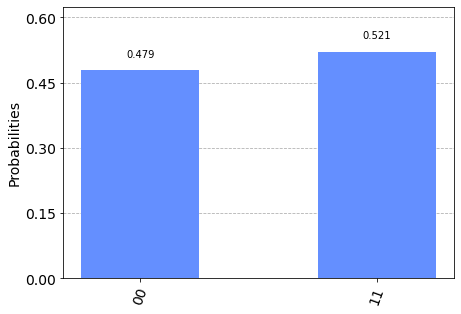

In [10]:
plot_histogram(counts)

In [11]:
import numpy as np
from qiskit import QuantumCircuit

%matplotlib inline



In [12]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)


In [13]:
circ


In [14]:
print(circ)

     
q_0: 
     
q_1: 
     
q_2: 
     


In [15]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

In [21]:
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [19]:
!pip install pylatexenc

In [22]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

/home/arun/DS/manoj_das/env2/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


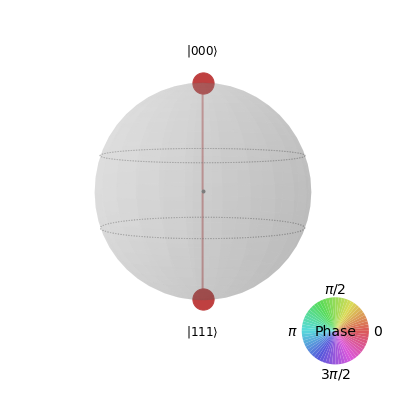

In [26]:
state.draw('qsphere')

In [25]:
!pip install seaborn

     |████████████████████████████████| 285 kB 36 kB/s eta 0:00:01


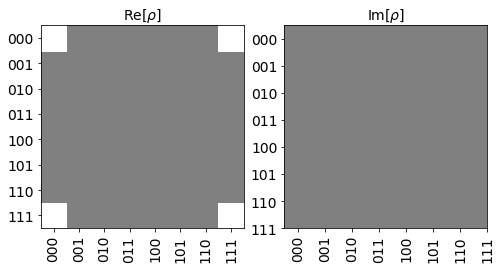

In [27]:
state.draw('hinton')


In [28]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [29]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [30]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use Aer's qasm_simulator
from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()


In [31]:
result_sim

Result(backend_name='qasm_simulator', backend_version='0.8.1', qobj_id='d9cc10e0-b7bf-44f9-9f87-65ab0f986c44', job_id='452d19dc-21f3-45c6-9898-4ff3b8aa7809', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 499, '0x7': 525}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-96', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=1243860321, metadata={'parallel_shots': 1, 'method': 'stabilizer', 'parallel_state_update': 8, 'measure_sampling': True, 'fusion': {'enabled': False}}, time_taken=0.0026899040000000003)], date=2021-04-17T20:31:15.828148, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.1'), metadata={'time_taken': 0.0028793760000000003, 'parallel_experiments': 1, 'omp_enabled': True, '

In [32]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 499, '111': 525}


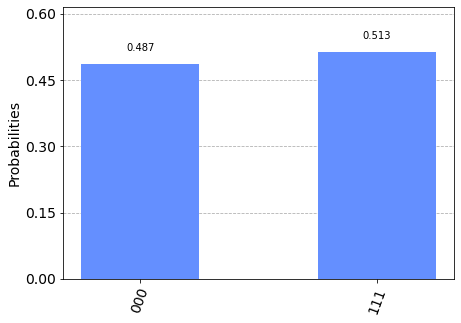

In [33]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [36]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright



In [35]:
!pip install ipywidgets

  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Using cached jupyterlab_widgets-1.0.0-py3-none-any.whl (243 kB)


In [37]:
import numpy as np
from qiskit import *


In [38]:
from qiskit.circuit import Gate

my_gate = Gate(name='my_gate', num_qubits=2, params=[])



In [39]:
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()

┌──────────┐            
q_0: ┤0         ├────────────
     │  my_gate │┌──────────┐
q_1: ┤1         ├┤0         ├
     └──────────┘│  my_gate │
q_2: ────────────┤1         ├
                 └──────────┘

In [40]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()


<ipython-input-40-1b85e9df9bff>:8: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  sub_circ.u3(1, 2, -2, sub_q[0])


┌───┐                       
q_0: ┤ H ├──■────────────────────
     └───┘┌─┴─┐     ┌───────────┐
q_1: ─────┤ X ├──■──┤0          ├
          └───┘┌─┴─┐│  sub_circ │
q_2: ──────────┤ X ├┤1          ├
               └───┘└───────────┘

In [41]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()



┌─────────┐                                         
q_0: ┤ U2(0,π) ├──■──────────────────────────────────────
     └─────────┘┌─┴─┐     ┌───┐          ░ ┌────────────┐
q_1: ───────────┤ X ├──■──┤ H ├────■─────░─┤ U3(1,2,-2) ├
                └───┘┌─┴─┐└───┘┌───┴───┐ ░ └───┬───┬────┘
q_2: ────────────────┤ X ├─────┤ RZ(1) ├─░─────┤ I ├─────
                     └───┘     └───────┘ ░     └───┘

In [42]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw()

┌───┐                     ░ ┌───────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ RZ(θ) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├───────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ RZ(θ) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├───────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ RZ(θ) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├───────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ RZ(θ) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├───────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ RZ(θ) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └───────┘ ░ └───┘                     ║ 
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0

In [43]:
print(qc.parameters)

ParameterView([Parameter(θ)])


In [44]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

┌───┐                     ░ ┌────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ RZ(2π) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ RZ(2π) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ RZ(2π) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ RZ(2π) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ RZ(2π) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └────────┘ ░ └───┘                     ║ 
c: 1/═══════════════════════════════════════════════════════════════════╩═
                                                                        0

In [45]:
job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range])

counts = job.result().get_counts()


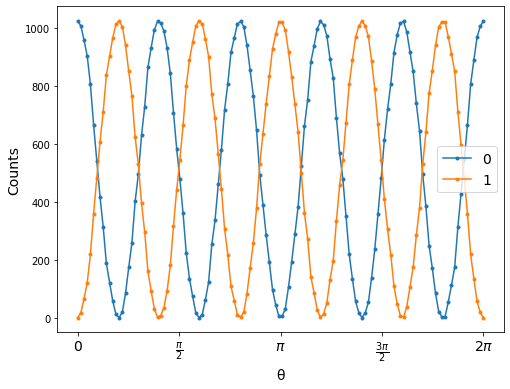

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

In [47]:
import time
from itertools import combinations
from qiskit.compiler import assemble
from qiskit.test.mock import FakeVigo

start = time.time()
qcs = []

theta_range = np.linspace(0, 2*np.pi, 32)

for n in theta_range:
    qc = QuantumCircuit(5)

    for k in range(8):
        for i,j in combinations(range(5), 2):
            qc.cx(i,j)
        qc.rz(n, range(5))
        for i,j in combinations(range(5), 2):
            qc.cx(i,j)

    qcs.append(qc)

compiled_circuits = transpile(qcs, backend=FakeVigo())
qobj = assemble(compiled_circuits, backend=FakeVigo())

end = time.time()
print('Time compiling over set of bound circuits: ', end-start)

Time compiling over set of bound circuits:  2.0462656021118164


In [48]:
start = time.time()
qc = QuantumCircuit(5)
theta = Parameter('theta')

for k in range(8):
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)
    qc.rz(theta, range(5))
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)

transpiled_qc = transpile(qc, backend=FakeVigo())
qobj = assemble([transpiled_qc.bind_parameters({theta: n})
                 for n in theta_range], backend=FakeVigo())
end = time.time()
print('Time compiling over parameterized circuit, then binding: ', end-start)

Time compiling over parameterized circuit, then binding:  1.2677485942840576


In [49]:
phi = Parameter('phi')

sub_circ1 = QuantumCircuit(2, name='sc_1')
sub_circ1.rz(phi, 0)
sub_circ1.rx(phi, 1)

sub_circ2 = QuantumCircuit(2, name='sc_2')
sub_circ2.rx(phi, 0)
sub_circ2.rz(phi, 1)

qc = QuantumCircuit(4)
qr = qc.qregs[0]

qc.append(sub_circ1.to_instruction(), [qr[0], qr[1]])
qc.append(sub_circ2.to_instruction(), [qr[0], qr[1]])

qc.append(sub_circ2.to_instruction(), [qr[2], qr[3]])

print(qc.draw())

# The following raises an error: "QiskitError: 'Name conflict on adding parameter: phi'"
# phi2 = Parameter('phi')
# qc.u3(0.1, phi2, 0.3, 0)



     ┌────────────┐┌────────────┐
q_0: ┤0           ├┤0           ├
     │  sc_1(phi) ││  sc_2(phi) │
q_1: ┤1           ├┤1           ├
     ├────────────┤└────────────┘
q_2: ┤0           ├──────────────
     │  sc_2(phi) │              
q_3: ┤1           ├──────────────
     └────────────┘              


In [50]:
p = Parameter('p')
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])
print(larger_qc.draw())

print(larger_qc.decompose().draw())


       ┌────────────────┐
q76_0: ┤0               ├
       │                │
q76_1: ┤1 oracle(theta) ├
       │                │
q76_2: ┤2               ├
       └┬──────────────┬┘
q76_3: ─┤0             ├─
        │              │ 
q76_4: ─┤1 oracle(phi) ├─
        │              │ 
q76_5: ─┤2             ├─
       ┌┴──────────────┴┐
q76_6: ┤0               ├
       │                │
q76_7: ┤1 oracle(gamma) ├
       │                │
q76_8: ┤2               ├
       └────────────────┘
       ┌───────────┐                                    
q76_0: ┤ RZ(theta) ├──■─────────────────────────────────
       └───────────┘┌─┴─┐┌───────────┐                  
q76_1: ─────────────┤ X ├┤ RZ(theta) ├──■───────────────
                    └───┘└───────────┘┌─┴─┐┌───────────┐
q76_2: ───────────────────────────────┤ X ├┤ RZ(theta) ├
        ┌─────────┐                   └───┘└───────────┘
q76_3: ─┤ RZ(phi) ├───■─────────────────────────────────
        └─────────┘ ┌─┴─┐ ┌─────────┐             

In [51]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

In [52]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [53]:
XX.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [54]:
input_dim, output_dim = XX.dim
input_dim, output_dim

(4, 4)

In [55]:
op = Operator(np.random.rand(2 ** 1, 2 ** 2))
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (2, 2)
Output dimensions: (2,)


In [56]:
op = Operator(np.random.rand(6, 6))
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (6,)
Output dimensions: (6,)


In [57]:
# Force input dimension to be (4,) rather than (2, 2)
op = Operator(np.random.rand(2 ** 1, 2 ** 2), input_dims=[4])
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())


Input dimensions: (4,)
Output dimensions: (2,)


In [58]:
# Specify system is a qubit and qutrit
op = Operator(np.random.rand(6, 6),
              input_dims=[2, 3], output_dims=[2, 3])
print('Input dimensions:', op.input_dims())
print('Output dimensions:', op.output_dims())

Input dimensions: (2, 3)
Output dimensions: (2, 3)


In [59]:
print('Dimension of input system 0:', op.input_dims([0]))
print('Dimension of input system 1:', op.input_dims([1]))

Dimension of input system 0: (2,)
Dimension of input system 1: (3,)


In [60]:
# Create an Operator from a Pauli object

pauliXX = Pauli(label='XX')
Operator(pauliXX)

/home/arun/DS/manoj_das/env2/lib/python3.8/site-packages/qiskit/quantum_info/operators/symplectic/pauli.py:187: DeprecationWarning: Initializing Pauli from `Pauli(label=l)` kwarg is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. Use `Pauli(l)` instead.
  base_z, base_x, base_phase = self._from_label_deprecated(label)


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [61]:
# Create an Operator for a Gate object
Operator(CXGate())



Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [62]:
# Create an operator from a parameterized Gate object
Operator(RXGate(np.pi / 2))


Operator([[0.70710678+0.j        , 0.        -0.70710678j],
          [0.        -0.70710678j, 0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))

In [63]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

In [65]:
# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
# circ.draw('mpl')
circ.draw()

┌──────────┐┌─┐   
q_0: ┤0         ├┤M├───
     │  unitary │└╥┘┌─┐
q_1: ┤1         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  0  1

In [66]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, backend, basis_gates=['u1','u2','u3','cx'])
job.result().get_counts(0)

{'11': 1024}

In [67]:
# Add to a circuit
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli(label='XX'), [0, 1])
circ2.measure([0,1], [0,1])
circ2.draw()

┌────────────┐┌─┐   
q_0: ┤0           ├┤M├───
     │  PAULI(XX) │└╥┘┌─┐
q_1: ┤1           ├─╫─┤M├
     └────────────┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1

In [68]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.tensor(B)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [69]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.expand(B)

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [70]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.compose(B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [71]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.compose(B, front=True)


Operator([[ 0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [72]:
# Compose XZ with an 3-qubit identity operator
op = Operator(np.eye(2 ** 3))
XZ = Operator(Pauli(label='XZ'))
op.compose(XZ, qargs=[0, 2])

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [73]:
# Compose YX in front of the previous operator
op = Operator(np.eye(2 ** 3))
YX = Operator(Pauli(label='YX'))
op.compose(XZ, qargs=[0, 2], front=True)


Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [74]:
XX = Operator(Pauli(label='XX'))
YY = Operator(Pauli(label='YY'))
ZZ = Operator(Pauli(label='ZZ'))

op = 0.5 * (XX + YY - 3 * ZZ)
op

Operator([[-1.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
          [ 0. +0.j,  1.5+0.j,  1. +0.j,  0. +0.j],
          [ 0. +0.j,  1. +0.j,  1.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. +0.j, -1.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [75]:
op.is_unitary()

False

In [76]:
# Compose with a matrix passed as a list
Operator(np.eye(2)).compose([[0, 1], [1, 0]])



Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [77]:
Operator(Pauli(label='X')) == Operator(XGate())



True

In [78]:
Operator(XGate()) == np.exp(1j * 0.5) * Operator(XGate())

False

In [79]:
# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)


Process fidelity = 1.0


In [80]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister


In [81]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));


In [82]:
print(circuit)



     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [83]:
circuit.draw()



┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

In [84]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);


In [85]:
print(circuit)

            ░ ┌───┐ ░    ┌─┐                           
qa_0: ──────░─┤ H ├─░────┤M├───────────────────────────
      ┌───┐ ░ ├───┤ ░    └╥┘┌─┐                        
qa_1: ┤ X ├─░─┤ H ├─░─────╫─┤M├────────────────────────
      └───┘ ░ ├───┤ ░     ║ └╥┘┌─┐                     
qa_2: ──────░─┤ H ├─░─────╫──╫─┤M├─────────────────────
            ░ ├───┤ ░     ║  ║ └╥┘    ░ ┌─┐            
qb_0: ──────░─┤ H ├─■─────╫──╫──╫──X──░─┤M├────────────
      ┌───┐ ░ ├───┤ │     ║  ║  ║  │  ░ └╥┘┌─┐         
qb_1: ┤ X ├─░─┤ H ├─X─────╫──╫──╫──┼──░──╫─┤M├─────────
      ├───┤ ░ ├───┤ │     ║  ║  ║  │  ░  ║ └╥┘┌─┐      
qb_2: ┤ X ├─░─┤ H ├─X──■──╫──╫──╫──┼──░──╫──╫─┤M├──────
      └───┘ ░ ├───┤    │  ║  ║  ║  │  ░  ║  ║ └╥┘┌─┐   
qb_3: ──────░─┤ H ├────X──╫──╫──╫──■──░──╫──╫──╫─┤M├───
      ┌───┐ ░ ├───┤    │  ║  ║  ║  │  ░  ║  ║  ║ └╥┘┌─┐
qb_4: ┤ X ├─░─┤ H ├────X──╫──╫──╫──X──░──╫──╫──╫──╫─┤M├
      └───┘ ░ └───┘       ║  ║  ║     ░  ║  ║  ║  ║ └╥┘
c0: 3/════════════════════╩══╩══╩════════╬══╬══╬

In [86]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager


In [87]:
circ = QuantumCircuit(3)
circ.ccx(0, 1, 2)
circ.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [88]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circ)
print(new_circ)

                                                                       »
q_0: ──────────────────────────────■────────────────────────────────■──»
                                   │                  ┌─────────┐   │  »
q_1: ─────────────■────────────────┼───────────────■──┤ U1(π/4) ├───┼──»
     ┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐├─────────┴┐┌─┴─┐»
q_2: ┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├»
     └─────────┘└───┘└──────────┘└───┘└─────────┘└───┘└──────────┘└───┘»
«                ┌─────────┐      
«q_0: ─────■─────┤ U1(π/4) ├───■──
«        ┌─┴─┐   ├─────────┴┐┌─┴─┐
«q_1: ───┤ X ├───┤ U1(-π/4) ├┤ X ├
«     ┌──┴───┴──┐├─────────┬┘└───┘
«q_2: ┤ U1(π/4) ├┤ U2(0,π) ├──────
«     └─────────┘└─────────┘      


In [89]:
from qiskit.transpiler import passes
[pass_ for pass_ in dir(passes) if pass_[0].isupper()]

['ALAPSchedule',
 'ASAPSchedule',
 'ApplyLayout',
 'BarrierBeforeFinalMeasurements',
 'BasicSwap',
 'BasisTranslator',
 'CSPLayout',
 'CXCancellation',
 'CXDirection',
 'CheckCXDirection',
 'CheckGateDirection',
 'CheckMap',
 'Collect2qBlocks',
 'CommutationAnalysis',
 'CommutativeCancellation',
 'ConsolidateBlocks',
 'CountOps',
 'CountOpsLongestPath',
 'CrosstalkAdaptiveSchedule',
 'DAGFixedPoint',
 'DAGLongestPath',
 'Decompose',
 'DenseLayout',
 'Depth',
 'EnlargeWithAncilla',
 'Error',
 'FixedPoint',
 'FullAncillaAllocation',
 'GateDirection',
 'HoareOptimizer',
 'Layout2qDistance',
 'LayoutTransformation',
 'LookaheadSwap',
 'MergeAdjacentBarriers',
 'NoiseAdaptiveLayout',
 'NumTensorFactors',
 'Optimize1qGates',
 'Optimize1qGatesDecomposition',
 'OptimizeSwapBeforeMeasure',
 'RZXCalibrationBuilder',
 'RemoveDiagonalGatesBeforeMeasure',
 'RemoveFinalMeasurements',
 'RemoveResetInZeroState',
 'ResourceEstimation',
 'SabreLayout',
 'SabreSwap',
 'SetLayout',
 'Size',
 'StochasticSw

In [90]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

circuit = QuantumCircuit(7)
circuit.h(3)
circuit.cx(0, 6)
circuit.cx(6, 0)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)

coupling_map = CouplingMap(couplinglist=coupling)

bs = BasicSwap(coupling_map=coupling_map)
pass_manager = PassManager(bs)
basic_circ = pass_manager.run(circuit)

ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(circuit)

ss = StochasticSwap(coupling_map=coupling_map)
pass_manager = PassManager(ss)
stochastic_circ = pass_manager.run(circuit)

In [91]:
circ.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [92]:
circuit.draw()

┌───┐          ┌───┐
q_0: ───────■──┤ X ├──■───────┤ X ├
            │  └─┬─┘┌─┴─┐┌───┐└─┬─┘
q_1: ───────┼────┼──┤ X ├┤ X ├──┼──
            │    │  └───┘└─┬─┘  │  
q_2: ───────┼────┼─────────┼────┼──
     ┌───┐  │    │         │    │  
q_3: ┤ H ├──┼────┼─────────■────■──
     └───┘  │    │                 
q_4: ───────┼────┼─────────────────
            │    │                 
q_5: ───────┼────┼─────────────────
          ┌─┴─┐  │                 
q_6: ─────┤ X ├──■─────────────────
          └───┘

In [93]:
basic_circ.draw()

┌───┐   ┌───┐     
q_0: ──X────────────────────────────────────┤ X ├───┤ X ├─────
       │                                    └─┬─┘   └─┬─┘     
q_1: ──X───X──────────────────────────────X───■───X───■────■──
           │                              │       │      ┌─┴─┐
q_2: ──────X──X────────────────────────X──X───X───X──────┤ X ├
     ┌───┐    │                        │      │          └───┘
q_3: ┤ H ├────X──X──────────────────X──X──────X───────────────
     └───┘       │                  │                         
q_4: ────────────X──X────────────X──X─────────────────────────
                    │      ┌───┐ │                            
q_5: ───────────────X───■──┤ X ├─X────────────────────────────
                      ┌─┴─┐└─┬─┘                              
q_6: ─────────────────┤ X ├──■────────────────────────────────
                      └───┘

In [94]:
lookahead_circ.draw()

q_0: ──X──────X─────────────────────────────
       │      │                             
q_1: ──X───X──X───X──────────────■───X──────
           │      │       ┌───┐┌─┴─┐ │      
q_2: ──────X──X───X───────┤ X ├┤ X ├─X───■──
     ┌───┐    │      ┌───┐└─┬─┘└───┘   ┌─┴─┐
q_3: ┤ H ├────X───■──┤ X ├──■──────────┤ X ├
     └───┘      ┌─┴─┐└─┬─┘             └───┘
q_4: ──────X────┤ X ├──■────────────────────
           │    └───┘                       
q_5: ──X───X────────────────────────────────
       │                                    
q_6: ──X────────────────────────────────────

In [95]:
stochastic_circ.draw()

q_0: ─X─────X───────────────────────────────────
      │     │              ┌───┐                
q_1: ─X──X──X──────────────┤ X ├─X───────X──────
         │    ┌───┐        └─┬─┘ │ ┌───┐ │ ┌───┐
q_2: ────X──X─┤ H ├──────X───■───X─┤ X ├─X─┤ X ├
            │ └───┘┌───┐ │         └─┬─┘   └─┬─┘
q_3: ───────X───■──┤ X ├─X───────────■───────■──
              ┌─┴─┐└─┬─┘                        
q_4: ────X────┤ X ├──■──────────────────────────
         │    └───┘                             
q_5: ─X──X──────────────────────────────────────
      │                                         
q_6: ─X─────────────────────────────────────────

In [96]:
import math
from qiskit.test.mock import FakeTokyo

backend = FakeTokyo()     # mimics the tokyo device in terms of coupling map and basis gates


In [97]:
qc = QuantumCircuit(10)

random_state = [
    1 / math.sqrt(4) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    0,
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(8) * complex(0, 1),
    0,
    0,
    0,
    0,
    1 / math.sqrt(4) * complex(1, 0),
    1 / math.sqrt(8) * complex(1, 0)]

qc.initialize(random_state, range(4))
qc.draw()


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
q_8: »
     »
q_9: »
     »
«     ┌────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                           ├
«     │                                                                            │
«q_1: ┤1                                                                           ├
«     │  initialize(0.5j,0.35355,0,0,0,0,0,0,0.35355,0.35355j,0,0,0,0,0.5,0.35355) │
«q_2: ┤2                                                                           ├
«     │                                                                            │
«q_3: ┤3                                                                           ├
«     └────────────────────────────────────────────────────────────────────────────┘
«q_4: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_5: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_6: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_7: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_8: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_9: ──────────────────────────────────────────────────────────────────────────────
«

In [98]:
optimized_0 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=0)
print('gates = ', optimized_0.count_ops())
print('depth = ', optimized_0.depth())

gates =  OrderedDict([('cx', 70), ('u3', 15), ('u1', 15), ('reset', 4)])
depth =  73


In [99]:
optimized_1 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=1)
print('gates = ', optimized_1.count_ops())
print('depth = ', optimized_1.depth())

gates =  OrderedDict([('cx', 70), ('u3', 15), ('u1', 6)])
depth =  64


In [100]:
optimized_2 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=2)
print('gates = ', optimized_2.count_ops())
print('depth = ', optimized_2.depth())


gates =  OrderedDict([('cx', 63), ('u3', 15), ('u1', 6)])
depth =  67


In [101]:
optimized_3 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth =  38


In [102]:
optimized_3 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())



gates =  OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth =  38


In [103]:
optimized_3 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth =  38


In [104]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1]).c_if(c, 2)

In [105]:
circ.draw()

┌───┐     ┌─┐           
q_0: ┤ H ├──■──┤M├───────────
     └───┘┌─┴─┐└╥┘┌─────────┐
q_1: ─────┤ X ├─╫─┤ RZ(0.5) ├
          └───┘ ║ └────╥────┘
q_2: ───────────╫──────╫─────
                ║   ┌──╨──┐  
c: 3/═══════════╩═══╡ = 2 ╞══
                0   └─────┘

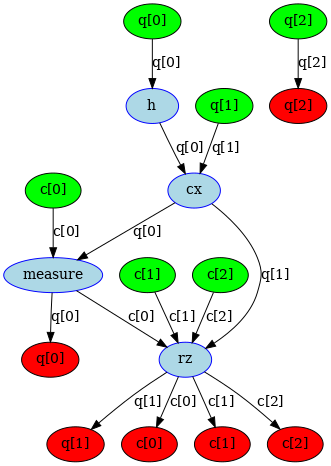

In [108]:
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
dag = circuit_to_dag(circ)
dag_drawer(dag)

In [107]:
!pip install pydot

In [109]:
dag.op_nodes()

In [110]:
node = dag.op_nodes()[3]
print("node name: ", node.name)
print("node op: ", node.op)
print("node qargs: ", node.qargs)
print("node cargs: ", node.cargs)
print("node condition: ", node.condition)


node name:  rz
node op:  <qiskit.circuit.library.standard_gates.rz.RZGate object at 0x7f7ff13667f0>
node qargs:  [Qubit(QuantumRegister(3, 'q'), 1)]
node cargs:  []
node condition:  (ClassicalRegister(3, 'c'), 2)


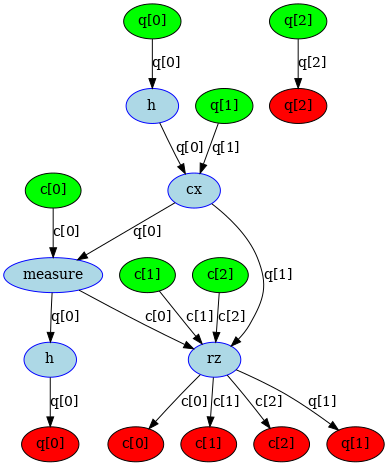

In [111]:
from qiskit.circuit.library import HGate
dag.apply_operation_back(HGate(), qargs=[q[0]])
dag_drawer(dag)

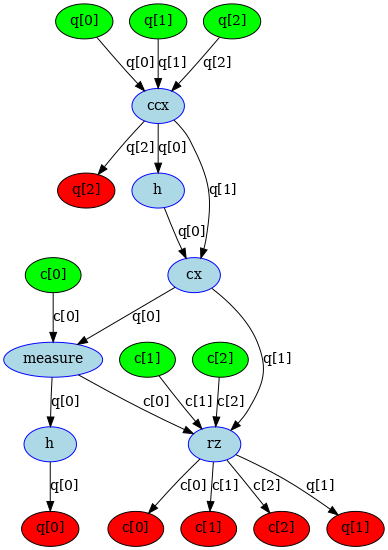

In [112]:
from qiskit.circuit.library import CCXGate
dag.apply_operation_front(CCXGate(), qargs=[q[0], q[1], q[2]], cargs=[])
dag_drawer(dag)

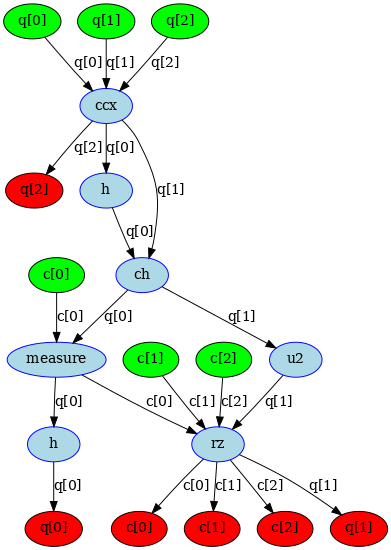

In [113]:
from qiskit.circuit.library import CHGate, U2Gate, CXGate
mini_dag = DAGCircuit()
p = QuantumRegister(2, "p")
mini_dag.add_qreg(p)
mini_dag.apply_operation_back(CHGate(), qargs=[p[1], p[0]])
mini_dag.apply_operation_back(U2Gate(0.1, 0.2), qargs=[p[1]])

# substitute the cx node with the above mini-dag
cx_node = dag.op_nodes(op=CXGate).pop()
dag.substitute_node_with_dag(node=cx_node, input_dag=mini_dag, wires=[p[0], p[1]])
dag_drawer(dag)

In [114]:
from qiskit.converters import dag_to_circuit
circuit = dag_to_circuit(dag)

In [115]:
circuit.draw(
)

┌───┐┌───┐               ┌─┐   ┌───┐   
q_0: ──■──┤ H ├┤ H ├───────────────┤M├───┤ H ├───
       │  └───┘└─┬─┘┌─────────────┐└╥┘┌──┴───┴──┐
q_1: ──■─────────■──┤ U2(0.1,0.2) ├─╫─┤ RZ(0.5) ├
     ┌─┴─┐          └─────────────┘ ║ └────╥────┘
q_2: ┤ X ├──────────────────────────╫──────╫─────
     └───┘                          ║   ┌──╨──┐  
c: 3/═══════════════════════════════╩═══╡ = 2 ╞══
                                    0   └─────┘

In [116]:
from copy import copy

from qiskit.transpiler.basepasses import TransformationPass
from qiskit.transpiler import Layout
from qiskit.circuit.library import SwapGate


class BasicSwap(TransformationPass):
    """Maps (with minimum effort) a DAGCircuit onto a `coupling_map` adding swap gates."""

    def __init__(self,
                 coupling_map,
                 initial_layout=None):
        """Maps a DAGCircuit onto a `coupling_map` using swap gates.

        Args:
            coupling_map (CouplingMap): Directed graph represented a coupling map.
            initial_layout (Layout): initial layout of qubits in mapping
        """
        super().__init__()
        self.coupling_map = coupling_map
        self.initial_layout = initial_layout

    def run(self, dag):
        """Runs the BasicSwap pass on `dag`.

        Args:
            dag (DAGCircuit): DAG to map.

        Returns:
            DAGCircuit: A mapped DAG.

        Raises:
            TranspilerError: if the coupling map or the layout are not
            compatible with the DAG.
        """
        new_dag = DAGCircuit()
        for qreg in dag.qregs.values():
            new_dag.add_qreg(qreg)
        for creg in dag.cregs.values():
            new_dag.add_creg(creg)


        if self.initial_layout is None:
            if self.property_set["layout"]:
                self.initial_layout = self.property_set["layout"]
            else:
                self.initial_layout = Layout.generate_trivial_layout(*dag.qregs.values())

        if len(dag.qubits) != len(self.initial_layout):
            raise TranspilerError('The layout does not match the amount of qubits in the DAG')

        if len(self.coupling_map.physical_qubits) != len(self.initial_layout):
            raise TranspilerError(
                "Mappers require to have the layout to be the same size as the coupling map")

        canonical_register = dag.qregs['q']
        trivial_layout = Layout.generate_trivial_layout(canonical_register)
        current_layout = trivial_layout.copy()

        for layer in dag.serial_layers():
            subdag = layer['graph']

            for gate in subdag.two_qubit_ops():
                physical_q0 = current_layout[gate.qargs[0]]
                physical_q1 = current_layout[gate.qargs[1]]
                if self.coupling_map.distance(physical_q0, physical_q1) != 1:
                    # Insert a new layer with the SWAP(s).
                    swap_layer = DAGCircuit()
                    swap_layer.add_qreg(canonical_register)

                    path = self.coupling_map.shortest_undirected_path(physical_q0, physical_q1)
                    for swap in range(len(path) - 2):
                        connected_wire_1 = path[swap]
                        connected_wire_2 = path[swap + 1]

                        qubit_1 = current_layout[connected_wire_1]
                        qubit_2 = current_layout[connected_wire_2]

                        # create the swap operation
                        swap_layer.apply_operation_back(SwapGate(),
                                                        qargs=[qubit_1, qubit_2],
                                                        cargs=[])

                    # layer insertion
                    order = current_layout.reorder_bits(new_dag.qubits)
                    new_dag.compose(swap_layer, qubits=order)

                    # update current_layout
                    for swap in range(len(path) - 2):
                        current_layout.swap(path[swap], path[swap + 1])

            order = current_layout.reorder_bits(new_dag.qubits)
            new_dag.compose(subdag, qubits=order)

        return new_dag


In [117]:
q = QuantumRegister(7, 'q')
in_circ = QuantumCircuit(q)
in_circ.h(q[0])
in_circ.cx(q[0], q[4])
in_circ.cx(q[2], q[3])
in_circ.cx(q[6], q[1])
in_circ.cx(q[5], q[0])
in_circ.rz(0.1, q[2])
in_circ.cx(q[5], q[0])

In [118]:
from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap
from qiskit import BasicAer
pm = PassManager()
coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
coupling_map = CouplingMap(couplinglist=coupling)

pm.append([BasicSwap(coupling_map)])

out_circ = pm.run(in_circ)

In [119]:
in_circ.draw()

┌───┐                     ┌───┐┌───┐
q_0: ┤ H ├───────■─────────────┤ X ├┤ X ├
     └───┘┌───┐  │             └─┬─┘└─┬─┘
q_1: ─────┤ X ├──┼───────────────┼────┼──
          └─┬─┘  │  ┌─────────┐  │    │  
q_2: ──■────┼────┼──┤ RZ(0.1) ├──┼────┼──
     ┌─┴─┐  │    │  └─────────┘  │    │  
q_3: ┤ X ├──┼────┼───────────────┼────┼──
     └───┘  │  ┌─┴─┐             │    │  
q_4: ───────┼──┤ X ├─────────────┼────┼──
            │  └───┘             │    │  
q_5: ───────┼────────────────────■────■──
            │                            
q_6: ───────■────────────────────────────

In [120]:
out_circ.draw()

┌───┐                                               ┌───┐
q_0: ┤ H ├─────X─────────────────────────────────────────┤ X ├
     └───┘     │                                         └─┬─┘
q_1: ──────────X──────X────────────────────────────────X───■──
          ┌─────────┐ │                                │      
q_2: ──■──┤ RZ(0.1) ├─X──X──────────────────────────X──X──────
     ┌─┴─┐└─────────┘    │         ┌───┐┌───┐       │         
q_3: ┤ X ├───────────────X───■─────┤ X ├┤ X ├────X──X─────────
     └───┘                 ┌─┴─┐   └─┬─┘└─┬─┘    │            
q_4: ──────────────────────┤ X ├─X───■────■───X──X────────────
                           └───┘ │            │               
q_5: ────────────────────────────X───X────────X───────────────
                                     │                        
q_6: ────────────────────────────────X────────────────────────

In [121]:
import logging

logging.basicConfig(level='DEBUG')

In [122]:
from qiskit.test.mock import FakeTenerife


log_circ = QuantumCircuit(2, 2)
log_circ.h(0)
log_circ.h(1)
log_circ.h(1)
log_circ.x(1)
log_circ.cx(0, 1)
log_circ.measure([0,1], [0,1])

backend = FakeTenerife()

transpile(log_circ, backend);

INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00858 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.09274 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.12946 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.11992 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.07606 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.35429 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.02193 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.04983 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.07057 (ms)
INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {('x', 1), ('cx', 2), ('measure', 1), ('h', 1)} to target basis {'reset', 'measure', 'delay', 'u2', 'u1', 'cx', 'barrier', 'snapshot', 'u3', 'id'}.
DEBUG:qiskit.transpiler.passes.basis.basis_transla

In [123]:
logging.getLogger('qiskit.transpiler').setLevel('INFO')
transpile(log_circ, backend);

INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00811 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.07415 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.12469 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.14520 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.10920 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 1.00493 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3qOrMore - 0.02742 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: CheckMap - 0.06008 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.08059 (ms)
INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {('x', 1), ('cx', 2), ('measure', 1), ('h', 1)} to target basis {'reset', 'measure', 'delay', 'u2', 'u1', 'cx', 'barrier', 'snapshot', 'u3', 'id'}.
INFO:qiskit.transpiler.passes.basis.basis_translat

In [ ]:
# Change log level back to DEBUG
logging.getLogger('qiskit.transpiler').setLevel('DEBUG')
# Transpile multiple circuits
circuits = [log_circ, log_circ]
transpile(circuits, backend);

INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00954 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: SetLayout - 0.00906 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.11420 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: TrivialLayout - 0.12898 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.25892 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Layout2qDistance - 0.23127 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.26751 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: FullAncillaAllocation - 0.19693 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.10157 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: EnlargeWithAncilla - 0.15998 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.42105 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ApplyLayout - 0.55981 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: Unroll3q

In [ ]:
formatter = logging.Formatter('%(name)s - %(processName)-10s - %(levelname)s: %(message)s')
handler = logging.getLogger().handlers[0]
handler.setFormatter(formatter)

In [ ]:
transpile(circuits, backend);

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

<ipython-input-1-893ac8a02083>:11: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  aqua_globals.random_seed = seed


/home/arun/DS/manoj_das/env2/lib/python3.8/site-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


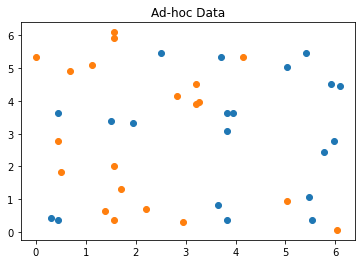

{'A': 0, 'B': 1}


In [2]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [3]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

/home/arun/DS/manoj_das/env2/lib/python3.8/site-packages/qiskit/aqua/algorithms/classifiers/qsvm/qsvm.py:102: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.classifiers',
/home/arun/DS/manoj_das/env2/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install 'qiskit-aqua[cvx]''.  No module named 'cvxpy'."

In [8]:
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

NameError: name 'result' is not defined

In [7]:
!pip install qiskit-aqua[cvx]

     |████████████████████████████████| 1.3 MB 158 kB/s ta 0:00:013
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 215 kB 67 bytes/s  0:00:01
     |████████████████████████████████| 147 kB 38 kB/s eta 0:00:01
     |████████████████████████████████| 126 kB 40 kB/s eta 0:00:01
     |████████████████████████████████| 921 kB 86 kB/s eta 0:00:01
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp38-cp38-linux_x86_64.whl size=3717190 sha256=70af3932060d2dc852c70727cb991d07d510fc756823a3d22325a940bb9e92a2
  Stored in directory: /home/arun/.cache/pip/wheels/e1/d7/30/db8c502deecf7c26f95e23e233a9987394b8744d8b3aafe6cf
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp38-cp38-linux_x86_64.whl size=217273 sha256=b8ccd4209bb978ac1fa628c085ed80ed23120a8aee170d7bd9bad35fc9189dd2
  Stored in directory: /home/arun/.cache/pip/wheels/c3/c1/ce/b551b0b3a40c990e1da2ec9aecff62f7c2d43cab8